## Midterm

In [344]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import random
import scipy
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
import pingouin as pg
import warnings
warnings.filterwarnings('ignore')

In [345]:
data = pd.read_csv('diabetes (2).csv')
data.head()

# pregnancies = the number of times pregnant
# glucose = plasma glucose concentration a 2 hours in an oral glucose tolerance test
# skinthickness = triceps ski fold thickness
# insulin = 2 hour serum insulin
# 

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

# Data Cleaning & EDA

In [346]:
data.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [347]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [348]:
# count 0
for column_name in data.columns:
    column = data[column_name] 
    count = (column == 0).sum()
    print('Count of zeros in column ', column_name, ' is : ', count)

Count of zeros in column  Pregnancies  is :  111
Count of zeros in column  Glucose  is :  5
Count of zeros in column  BloodPressure  is :  35
Count of zeros in column  SkinThickness  is :  227
Count of zeros in column  Insulin  is :  374
Count of zeros in column  BMI  is :  11
Count of zeros in column  DiabetesPedigreeFunction  is :  0
Count of zeros in column  Age  is :  0
Count of zeros in column  Outcome  is :  500


In [349]:
# missing value

data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [350]:
# duplicate

data.duplicated().sum()

0

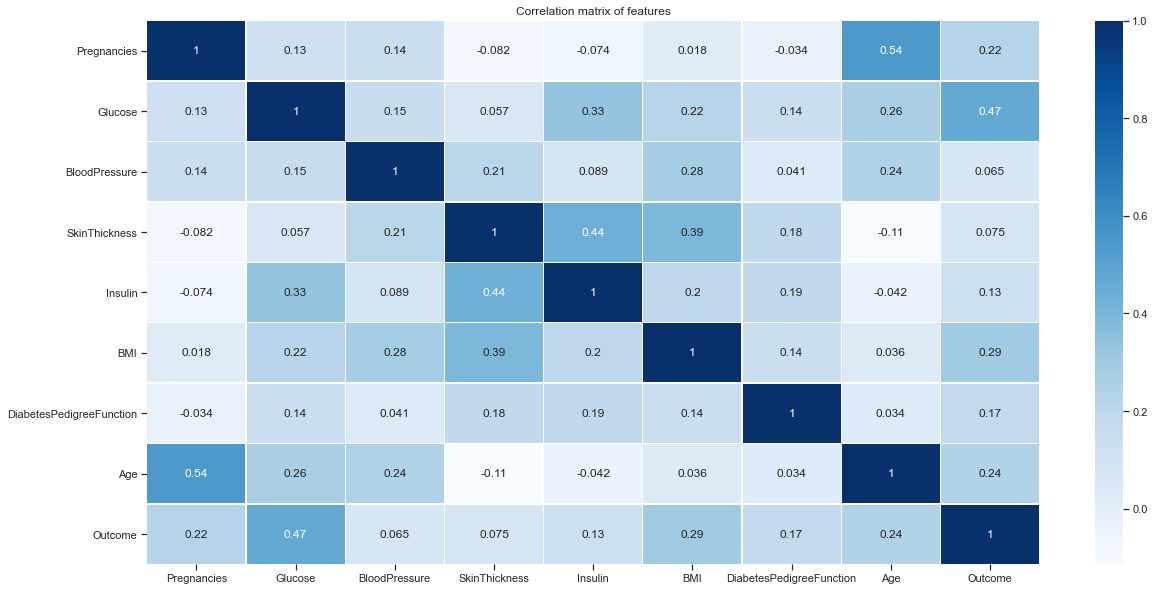

In [351]:
# correlation heatmap

corr = data.corr()
fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(corr,annot=True, cmap = 'Blues',linewidth = 0.30)
plt.title('Correlation matrix of features')
plt.show()

In [352]:
# outlier

data.skew()

Pregnancies                 0.901674
Glucose                     0.173754
BloodPressure              -1.843608
SkinThickness               0.109372
Insulin                     2.272251
BMI                        -0.428982
DiabetesPedigreeFunction    1.919911
Age                         1.129597
Outcome                     0.635017
dtype: float64

In [353]:
datav = data.copy()

In [354]:
for col in datav:
    print(col)

Pregnancies
Glucose
BloodPressure
SkinThickness
Insulin
BMI
DiabetesPedigreeFunction
Age
Outcome


In [355]:
for col in datav:
    
    q3,q1 = np.percentile(data.loc[:,col],[75,25])
    iqr = q3 - q1
    
    lower = q1 - 1.5*iqr
    upper = q3 + 1.5*iqr
    
    datav.loc[datav[col] < lower,col] = np.nan
    datav.loc[datav[col] > upper,col] = np.nan

In [356]:
datav.isnull().sum()

Pregnancies                  4
Glucose                      5
BloodPressure               45
SkinThickness                1
Insulin                     34
BMI                         19
DiabetesPedigreeFunction    29
Age                          9
Outcome                      0
dtype: int64

In [357]:
datav = datav.dropna(axis = 0)
datav.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 639 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               639 non-null    float64
 1   Glucose                   639 non-null    float64
 2   BloodPressure             639 non-null    float64
 3   SkinThickness             639 non-null    float64
 4   Insulin                   639 non-null    float64
 5   BMI                       639 non-null    float64
 6   DiabetesPedigreeFunction  639 non-null    float64
 7   Age                       639 non-null    float64
 8   Outcome                   639 non-null    float64
dtypes: float64(9)
memory usage: 49.9 KB


# Data Visualization

In [358]:
datav1 = datav.copy()

In [359]:
datav1.Outcome[datav1['Outcome'] == 0] = 'No Diabetes'
datav1.Outcome[datav1['Outcome'] == 1] = 'Has Diabetes'
datav1

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6.0    148.0           72.0           35.0      0.0  33.6   
1            1.0     85.0           66.0           29.0      0.0  26.6   
2            8.0    183.0           64.0            0.0      0.0  23.3   
3            1.0     89.0           66.0           23.0     94.0  28.1   
5            5.0    116.0           74.0            0.0      0.0  25.6   
..           ...      ...            ...            ...      ...   ...   
763         10.0    101.0           76.0           48.0    180.0  32.9   
764          2.0    122.0           70.0           27.0      0.0  36.8   
765          5.0    121.0           72.0           23.0    112.0  26.2   
766          1.0    126.0           60.0            0.0      0.0  30.1   
767          1.0     93.0           70.0           31.0      0.0  30.4   

     DiabetesPedigreeFunction   Age       Outcome  
0                       0.627  50.0  Has Diabetes  
1                       0.351  31.0   No Diabetes  
2                       0.672  32.0  Has Diabetes  
3                       0.167  21.0   No Diabetes  
5                       0.201  30.0   No Diabetes  
..                        ...   ...           ...  
763                     0.171  63.0   No Diabetes  
764                     0.340  27.0   No Diabetes  
765                     0.245  30.0   No Diabetes  
766                     0.349  47.0  Has Diabetes  
767                     0.315  23.0   No Diabetes  

[639 rows x 9 columns]

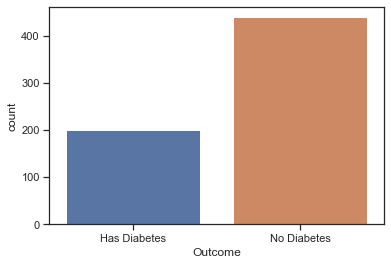

In [360]:
# count the total number of diabetes patient

sns.countplot(datav1['Outcome'],label='Count')

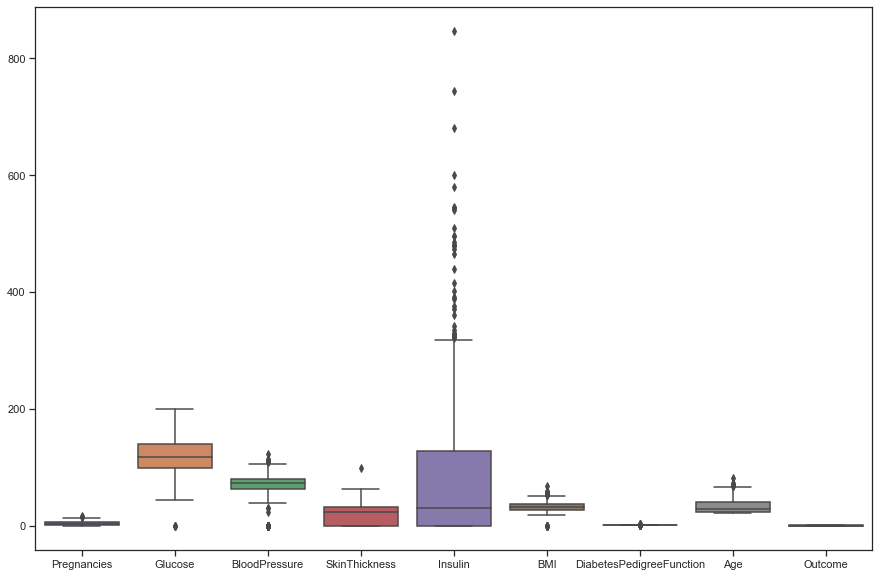

In [361]:
plt.figure(figsize = (15,10))
sns.boxplot(data=data)


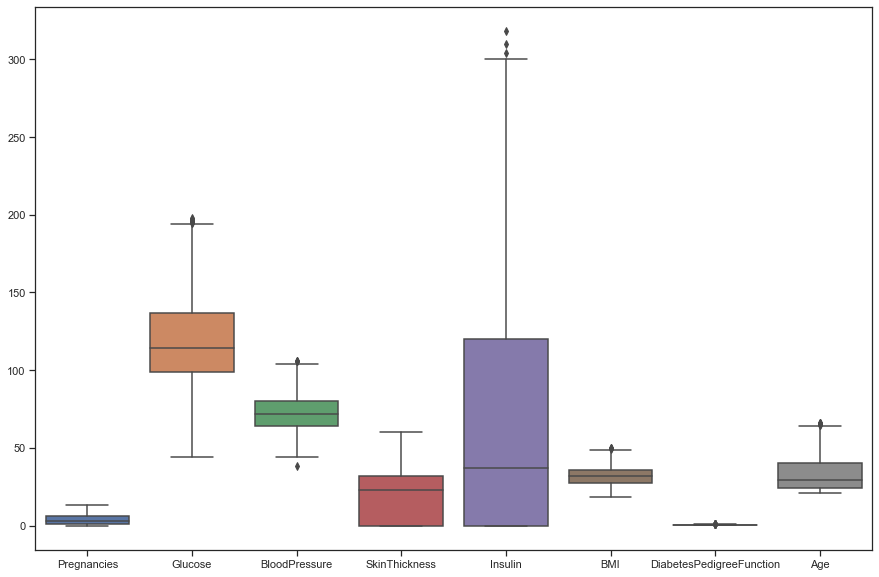

In [362]:
plt.figure(figsize = (15,10))
sns.boxplot(data=datav1)

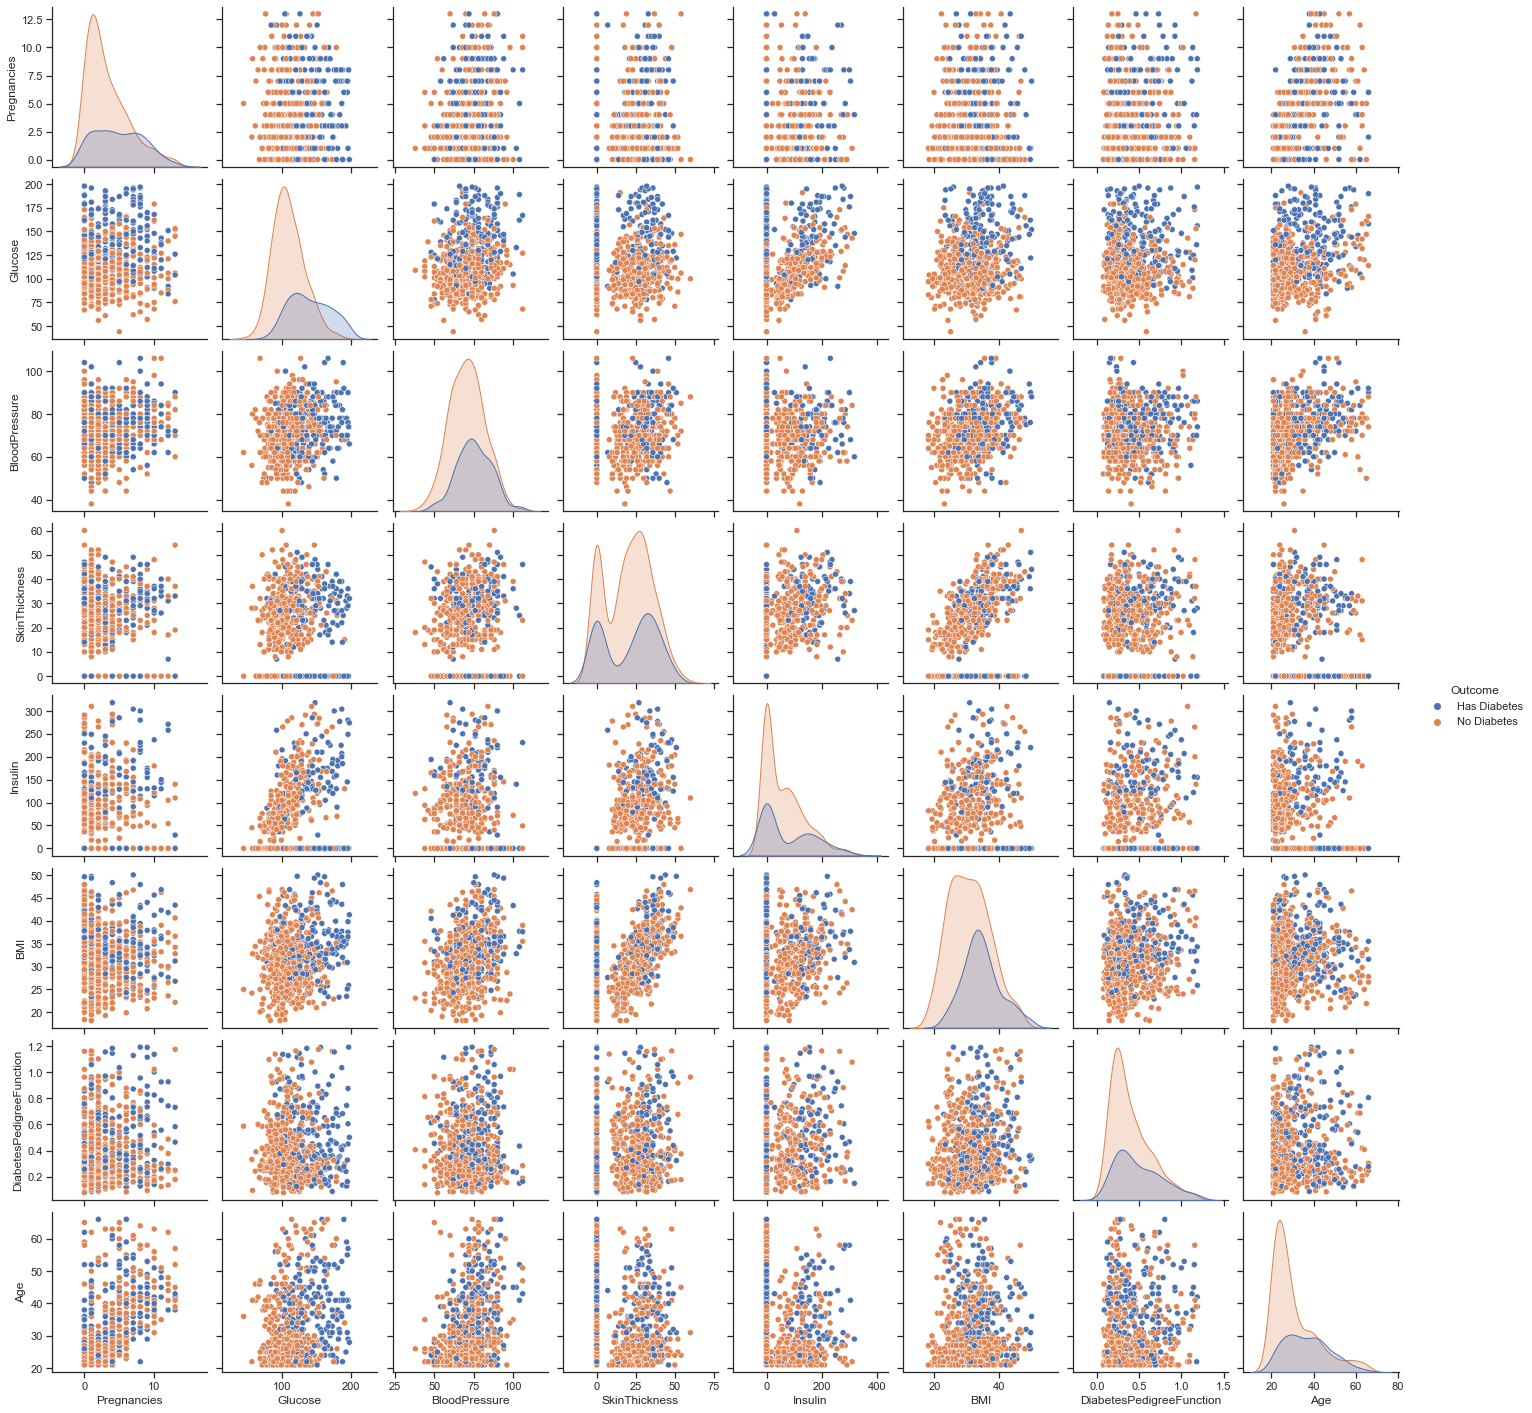

In [363]:
sns.set_theme(style='ticks')

sns.pairplot(datav1, hue='Outcome')

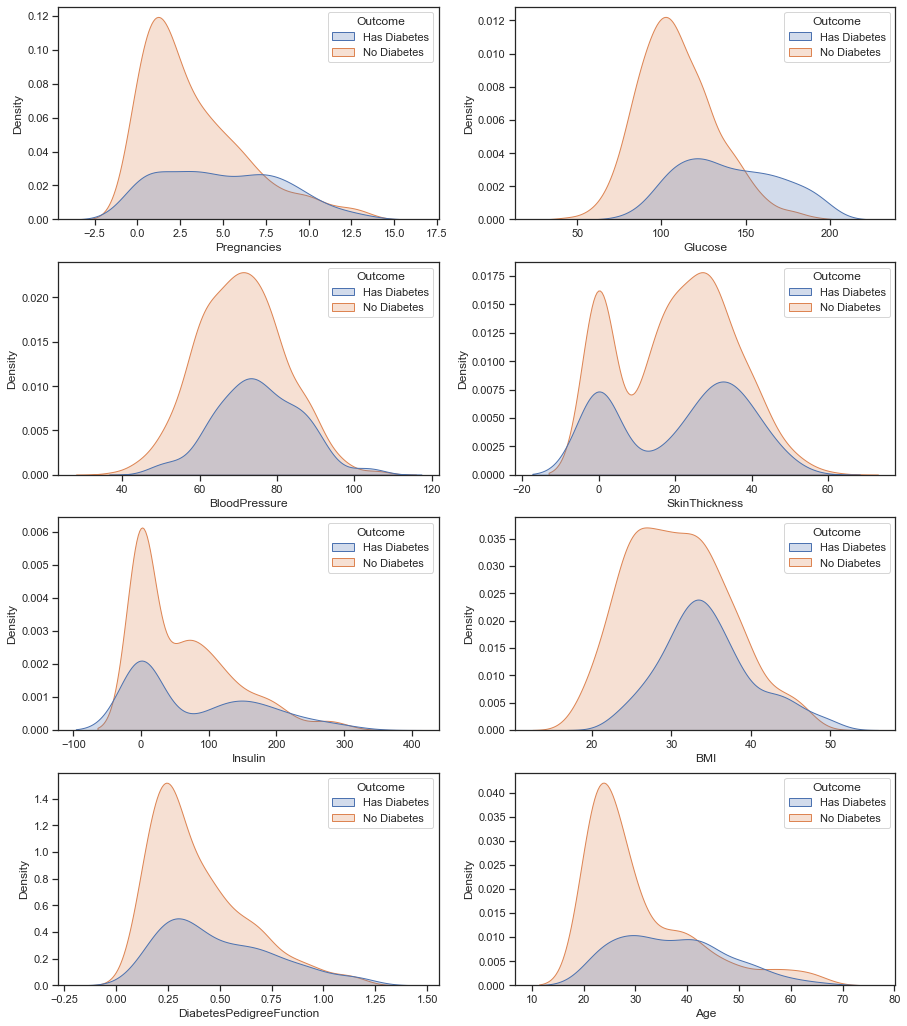

In [364]:
xvar = ['Pregnancies','Glucose','BloodPressure','SkinThickness',
        'Insulin','BMI','DiabetesPedigreeFunction','Age']

fig,ax = plt.subplots(4,2,figsize=(15,18))
axlist = [axes for axes_row in ax for axes in axes_row]

for i,column in enumerate(xvar):
    sns.kdeplot(x=column,hue='Outcome',data=datav1,shade=True,ax=axlist[i])
    plt.xlabel(column)


plt.show()

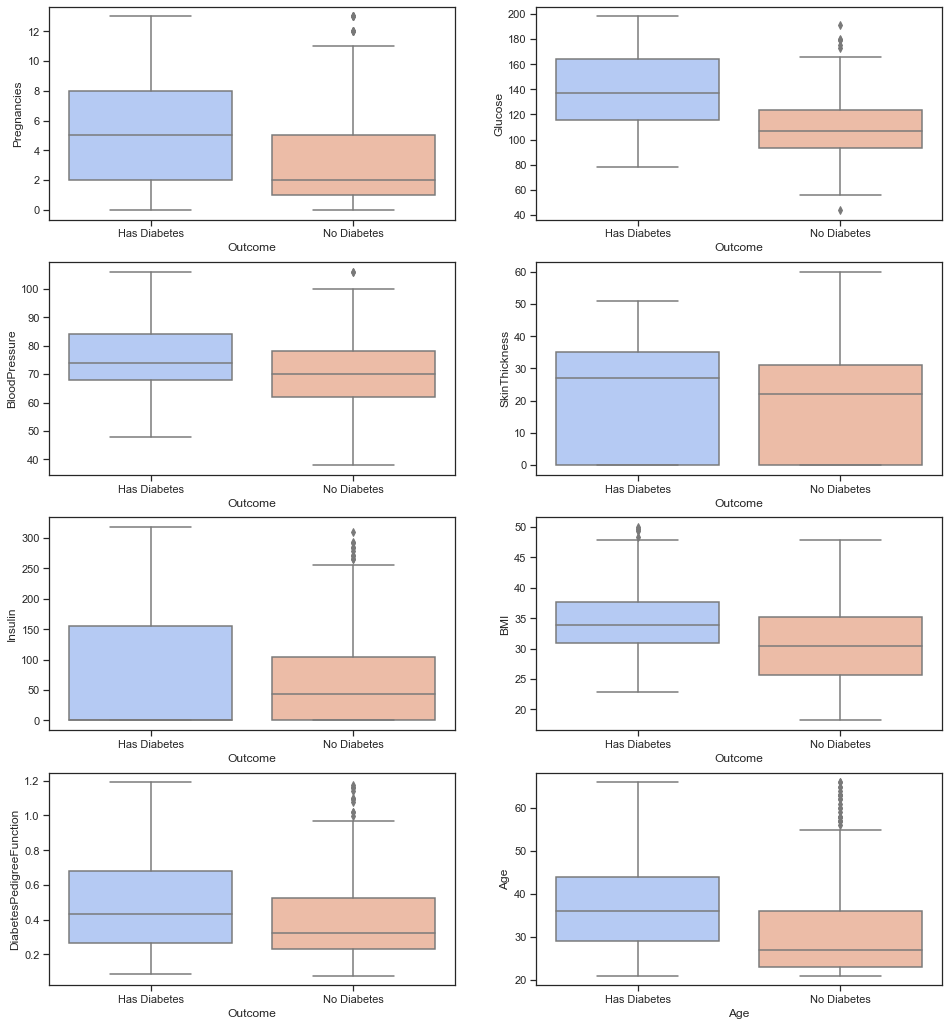

In [365]:
fig,ax = plt.subplots(4,2,figsize=(16,18))
axlist1 = [axes for axes_row in ax for axes in axes_row]

for i,column in enumerate(xvar):
    sns.boxplot(x='Outcome',y=column,data=datav1,ax=axlist1[i],palette='coolwarm')
    plt.xlabel(column)

plt.show()

# Initial Testing

In [366]:
datav.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          6.0    148.0           72.0           35.0      0.0  33.6   
1          1.0     85.0           66.0           29.0      0.0  26.6   
2          8.0    183.0           64.0            0.0      0.0  23.3   
3          1.0     89.0           66.0           23.0     94.0  28.1   
5          5.0    116.0           74.0            0.0      0.0  25.6   

   DiabetesPedigreeFunction   Age  Outcome  
0                     0.627  50.0      1.0  
1                     0.351  31.0      0.0  
2                     0.672  32.0      1.0  
3                     0.167  21.0      0.0  
5                     0.201  30.0      0.0

In [367]:
datav.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   639.000000  639.000000     639.000000     639.000000  639.000000   
mean      3.804382  119.112676      72.120501      20.563380   65.931142   
std       3.260995   29.162175      11.348686      15.339991   79.569482   
min       0.000000   44.000000      38.000000       0.000000    0.000000   
25%       1.000000   99.000000      64.000000       0.000000    0.000000   
50%       3.000000  114.000000      72.000000      23.000000   37.000000   
75%       6.000000  137.000000      80.000000      32.000000  120.000000   
max      13.000000  198.000000     106.000000      60.000000  318.000000   

             BMI  DiabetesPedigreeFunction         Age     Outcome  
count  639.00000                639.000000  639.000000  639.000000  
mean    32.00579                  0.429177   32.715180    0.312989  
std      6.43397                  0.250957   11.080651    0.464073  
min     18.20000                  0.078000   21.000000    0.000000  
25%     27.30000                  0.242000   24.000000    0.000000  
50%     32.00000                  0.358000   29.000000    0.000000  
75%     35.95000                  0.586000   40.000000    1.000000  
max     50.00000                  1.191000   66.000000    1.000000

In [368]:
datav.corr(method='pearson')

Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.142093       0.210666      -0.094425   
Glucose                      0.142093  1.000000       0.238754      -0.004609   
BloodPressure                0.210666  0.238754       1.000000       0.037388   
SkinThickness               -0.094425 -0.004609       0.037388       1.000000   
Insulin                     -0.114510  0.248225      -0.041513       0.487566   
BMI                          0.036958  0.192504       0.303301       0.390340   
DiabetesPedigreeFunction     0.009289  0.066530       0.024290       0.148486   
Age                          0.567438  0.286682       0.354036      -0.143376   
Outcome                      0.227987  0.492740       0.183298       0.030676   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.114510  0.036958                  0.009289   
Glucose                   0.248225  0.192504                  0.066530   
BloodPressure            -0.041513  0.303301                  0.024290   
SkinThickness             0.487566  0.390340                  0.148486   
Insulin                   1.000000  0.188635                  0.213191   
BMI                       0.188635  1.000000                  0.144757   
DiabetesPedigreeFunction  0.213191  0.144757                  1.000000   
Age                      -0.089535  0.063370                  0.030081   
Outcome                   0.097746  0.269371                  0.179072   

                               Age   Outcome  
Pregnancies               0.567438  0.227987  
Glucose                   0.286682  0.492740  
BloodPressure             0.354036  0.183298  
SkinThickness            -0.143376  0.030676  
Insulin                  -0.089535  0.097746  
BMI                       0.063370  0.269371  
DiabetesPedigreeFunction  0.030081  0.179072  
Age                       1.000000  0.263344  
Outcome                   0.263344  1.000000

In [369]:
datav.cov()

Pregnancies     Glucose  BloodPressure  \
Pregnancies                 10.634087   13.512672       7.796336   
Glucose                     13.512672  850.432425      79.016182   
BloodPressure                7.796336   79.016182     128.792667   
SkinThickness               -4.723476   -2.062012       6.508808   
Insulin                    -29.712550  575.985827     -37.486987   
BMI                          0.775429   36.119253      22.146166   
DiabetesPedigreeFunction     0.007602    0.486899       0.069179   
Age                         20.503758   92.637158      44.520268   
Outcome                      0.345021    6.668440       0.965360   

                          SkinThickness      Insulin        BMI  \
Pregnancies                   -4.723476   -29.712550   0.775429   
Glucose                       -2.062012   575.985827  36.119253   
BloodPressure                  6.508808   -37.486987  22.146166   
SkinThickness                235.315334   595.120359  38.525416   
Insulin                      595.120359  6331.302461  96.571246   
BMI                           38.525416    96.571246  41.395970   
DiabetesPedigreeFunction       0.571624     4.257105   0.233732   
Age                          -24.370634   -78.941273   4.517796   
Outcome                        0.218376     3.609360   0.804298   

                          DiabetesPedigreeFunction         Age   Outcome  
Pregnancies                               0.007602   20.503758  0.345021  
Glucose                                   0.486899   92.637158  6.668440  
BloodPressure                             0.069179   44.520268  0.965360  
SkinThickness                             0.571624  -24.370634  0.218376  
Insulin                                   4.257105  -78.941273  3.609360  
BMI                                       0.233732    4.517796  0.804298  
DiabetesPedigreeFunction                  0.062979    0.083648  0.020855  
Age                                       0.083648  122.780819  1.354176  
Outcome                                   0.020855    1.354176  0.215364

In [370]:
# one sample t-test
bmi = datav['BMI']
popmean = 32

In [371]:
tStat, pValue = scipy.stats.ttest_1samp(bmi, popmean, axis=0)
print('P-value:{0} T-statistic:{1}'.format(pValue,tStat))

P-value:0.9818571867287711 T-statistic:0.022749521455968577


In [372]:
# two-sample t-test

# null hypothesis: the mean of BMI for diabetes patient and no diabetes person is the same
# alternative hypothesis: the mean of BMI for diabetes patient is greater than no diabetes person

bmi_diabetes = datav.BMI[datav['Outcome'] == 1]
bmi_nodiabetes = datav.BMI[datav['Outcome'] == 0]

Text(0.5, 1.0, 'BMI')

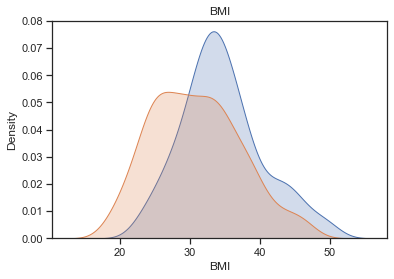

In [373]:
sns.kdeplot(bmi_diabetes, shade=True)
sns.kdeplot(bmi_nodiabetes, shade=True)
plt.title('BMI')

In [374]:
tStat, pValue = stats.ttest_ind(bmi_diabetes, bmi_nodiabetes, equal_var=False,alternative='greater')
print('P-value:{0} T-statistic:{1}'.format(pValue,tStat))

# reject null hypothesis

P-value:6.378583601243225e-13 T-statistic:7.318973283180112


In [375]:
# null hypothesis: the average age for diabetes patient and no diabetes person is the same
# althernative hypothesis: the average age for diabetes patient is greater than no diabetes person

age_diabetes = datav.Age[datav['Outcome'] == 1]
age_nodiabetes = datav.Age[datav['Outcome'] == 0]

Text(0.5, 1.0, 'Age')

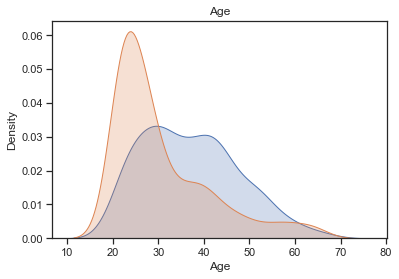

In [376]:
sns.kdeplot(age_diabetes, shade=True)
sns.kdeplot(age_nodiabetes, shade=True)
plt.title('Age')

In [377]:
tStat, pValue = stats.ttest_ind(age_diabetes, age_nodiabetes, equal_var=False,alternative='greater')
print('P-value:{0} T-statistic:{1}'.format(pValue,tStat))

# reject null hypothesis

P-value:6.736764605814148e-12 T-statistic:6.968132418856978


In [378]:
# null hypothesis: the average glucose concentration for diabetes patient and no diabetes person is the same
# althernative hypothesis: the average glucose concentration for diabetes patient is greater than no diabetes person

glu_diabetes = datav.Glucose[datav['Outcome'] == 1]
glu_nodiabetes = datav.Glucose[datav['Outcome'] == 0]

In [379]:
tStat, pValue = stats.ttest_ind(glu_diabetes, glu_nodiabetes, equal_var=False,alternative='greater')
print('P-value:{0} T-statistic:{1}'.format(pValue,tStat))

# reject null hypothesis

P-value:6.99897210804481e-32 T-statistic:13.0903213914713


In [380]:
# null hypothesis: the average blood pressure for diabetes patient and no diabetes person is the same
# althernative hypothesis: the average blood pressure for diabetes patient is greater than no diabetes person

bp_diabetes = datav.BloodPressure[datav['Outcome'] == 1]
bp_nodiabetes = datav.BloodPressure[datav['Outcome'] == 0]

In [381]:
tStat, pValue = stats.ttest_ind(bp_diabetes, bp_nodiabetes, equal_var=False,alternative='greater')
print('P-value:{0} T-statistic:{1}'.format(pValue,tStat))

# reject null hypothesis

P-value:1.430018797376657e-06 T-statistic:4.749525362402819


# Modeling - MLR

In [382]:
x = datav[datav.columns[:-1]]
y = datav.Outcome

In [383]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 100)

In [384]:
from sklearn.linear_model import LinearRegression

mlr = LinearRegression()  
mlr.fit(x_train, y_train)

LinearRegression()

In [385]:
coeff = pd.DataFrame(mlr.coef_, x.columns, columns=['Coefficient'])
coeff

Coefficient
Pregnancies                  0.016316
Glucose                      0.006618
BloodPressure               -0.000752
SkinThickness               -0.000100
Insulin                     -0.000232
BMI                          0.012586
DiabetesPedigreeFunction     0.236784
Age                          0.002012

In [403]:
print("Intercept: ", mlr.intercept_)

Intercept:  -1.0374911748688955


In [386]:
y_pred = mlr.predict(x_test)

In [387]:
pred_compare = pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
pred_compare

Actual  Predicted
183     0.0  -0.062822
481     0.0   0.254671
93      1.0   0.346333
510     1.0   0.193649
311     0.0   0.256746
..      ...        ...
293     1.0   0.443505
540     1.0   0.384226
98      0.0   0.112226
393     0.0   0.182178
323     1.0   0.699774

[128 rows x 2 columns]

In [388]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test,y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print('R squared: {:.2f}'.format(mlr.score(x,y)*100))

MAE: 0.3211489499368203
MSE: 0.14399979021183176
RMSE: 0.37947304279992244
R squared: 31.87


# Modeling - One Way ANOVA

In [389]:
data_class = datav.copy()
data_class.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 639 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               639 non-null    float64
 1   Glucose                   639 non-null    float64
 2   BloodPressure             639 non-null    float64
 3   SkinThickness             639 non-null    float64
 4   Insulin                   639 non-null    float64
 5   BMI                       639 non-null    float64
 6   DiabetesPedigreeFunction  639 non-null    float64
 7   Age                       639 non-null    float64
 8   Outcome                   639 non-null    float64
dtypes: float64(9)
memory usage: 66.1 KB


In [390]:
bmiconditions = [
    (data_class['BMI'] <= 18.5),
    (data_class['BMI'] > 18.5) & (data_class['BMI'] <= 25),
    (data_class['BMI'] > 25) & (data_class['BMI'] <= 30),
    (data_class['BMI'] > 30)
    ]

bmivalues = ['Underweight','Healthyweight','Overweight','Obesity']

data_class['BMI_Class'] = np.select(bmiconditions, bmivalues)

data_class.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          6.0    148.0           72.0           35.0      0.0  33.6   
1          1.0     85.0           66.0           29.0      0.0  26.6   
2          8.0    183.0           64.0            0.0      0.0  23.3   
3          1.0     89.0           66.0           23.0     94.0  28.1   
5          5.0    116.0           74.0            0.0      0.0  25.6   

   DiabetesPedigreeFunction   Age  Outcome      BMI_Class  
0                     0.627  50.0      1.0        Obesity  
1                     0.351  31.0      0.0     Overweight  
2                     0.672  32.0      1.0  Healthyweight  
3                     0.167  21.0      0.0     Overweight  
5                     0.201  30.0      0.0     Overweight

In [391]:
# plt.figure(figsize = (10,6))
# sns.boxplot(x='Genotype',y='value', hue='years',data=data_melt)

# data_class.kdeplot('Outcome', by='BMI_Class', figsize=(12,8))

aov = pg.anova(data=data_class, dv='Outcome', between='BMI_Class', detailed=True)
aov

Source          SS   DF        MS          F         p-unc       np2
0  BMI_Class   11.310652    3  3.770217  18.986905  8.390692e-12  0.082318
1     Within  126.091538  635  0.198569        NaN           NaN       NaN

In [ ]:
bmires = stat()
bmires.anova_stat(df=data_class, res_var='Outcome',
                  anova_model='Outcome ~ C(BMI_Class) + C(Age_Class) + C(BMI_Class):C(Age_Class)')
bmires.anova_summary

In [404]:
mod = ols('Outcome ~ BMI_Class', data=data_class).fit()

aov_table = sm.stats.anova_lm(mod, typ=2)
aov_table

sum_sq     df          F        PR(>F)
BMI_Class   11.310652    3.0  18.986905  8.390692e-12
Residual   126.091538  635.0        NaN           NaN

In [405]:
pair_t = mod.t_test_pairwise('BMI_Class')
pair_t.result_frame

coef   std err         t         P>|t|  \
Obesity-Healthyweight      0.340824  0.051036  6.678154  5.288165e-11   
Overweight-Healthyweight   0.140602  0.058134  2.418557  1.586241e-02   
Underweight-Healthyweight -0.073684  0.227448 -0.323961  7.460744e-01   
Overweight-Obesity        -0.200222  0.042472 -4.714254  2.983754e-06   
Underweight-Obesity       -0.414508  0.223957 -1.850836  6.465736e-02   
Underweight-Overweight    -0.214286  0.225681 -0.949509  3.427232e-01   

                           Conf. Int. Low  Conf. Int. Upp.     pvalue-hs  \
Obesity-Healthyweight            0.240605         0.441043  3.172899e-10   
Overweight-Healthyweight         0.026442         0.254761  6.195586e-02   
Underweight-Healthyweight       -0.520325         0.372957  7.460744e-01   
Overweight-Obesity              -0.283624        -0.116820  1.491868e-05   
Underweight-Obesity             -0.854294         0.025278  1.817007e-01   
Underweight-Overweight          -0.657456         0.228885  5.679872e-01   

                           reject-hs  
Obesity-Healthyweight           True  
Overweight-Healthyweight       False  
Underweight-Healthyweight      False  
Overweight-Obesity              True  
Underweight-Obesity            False  
Underweight-Overweight         False

In [392]:
pt = pg.pairwise_tukey(dv='Outcome',between='BMI_Class',effsize='cohen',data=data_class)
pt

A            B   mean(A)   mean(B)      diff        se  \
0  Healthyweight      Obesity  0.073684  0.414508 -0.340824  0.051036   
1  Healthyweight   Overweight  0.073684  0.214286 -0.140602  0.058134   
2  Healthyweight  Underweight  0.073684  0.000000  0.073684  0.227448   
3        Obesity   Overweight  0.414508  0.214286  0.200222  0.042472   
4        Obesity  Underweight  0.414508  0.000000  0.414508  0.223957   
5     Overweight  Underweight  0.214286  0.000000  0.214286  0.225681   

          T       p-tukey     cohen  
0 -6.678154  3.172876e-10 -0.764845  
1 -2.418557  7.462155e-02 -0.315525  
2  0.323961  9.882457e-01  0.165355  
3  4.714254  1.770263e-05  0.449320  
4  1.850836  2.506258e-01  0.930201  
5  0.949509  7.780495e-01  0.480880

In [393]:
from bioinfokit.analys import stat

res = stat()
res.tukey_hsd(df=data_class, res_var='Outcome',
              xfac_var='BMI_Class',anova_model='Outcome ~ C(BMI_Class)')
res.tukey_summary

group1         group2      Diff     Lower     Upper   q-value  \
0        Obesity     Overweight  0.200222  0.090820  0.309624  6.666961   
1        Obesity  Healthyweight  0.340824  0.209361  0.472286  9.444336   
2        Obesity    Underweight  0.414508 -0.162381  0.991397  2.617477   
3     Overweight  Healthyweight  0.140602 -0.009146  0.290349  3.420356   
4     Overweight    Underweight  0.214286 -0.367043  0.795614  1.342808   
5  Healthyweight    Underweight  0.073684 -0.512197  0.659565  0.458150   

    p-value  
0  0.001000  
1  0.001000  
2  0.250676  
3  0.074755  
4  0.752377  
5  0.900000

In [395]:
aov1 = pg.anova(data=data_class, dv='Age', between='BMI_Class', detailed=True)
aov1

Source            SS   DF          MS         F     p-unc       np2
0  BMI_Class    657.611331    3  219.203777  1.791974  0.147414  0.008395
1     Within  77676.551423  635  122.325278       NaN       NaN       NaN

In [396]:
pt1 = pg.pairwise_tukey(dv='Age',between='BMI_Class',effsize='cohen',data=data_class)
pt1

A            B    mean(A)    mean(B)      diff        se  \
0  Healthyweight      Obesity  31.442105  33.341969 -1.899864  1.266704   
1  Healthyweight   Overweight  31.442105  32.155844 -0.713739  1.442898   
2  Healthyweight  Underweight  31.442105  24.000000  7.442105  5.645259   
3        Obesity   Overweight  33.341969  32.155844  1.186125  1.054147   
4        Obesity  Underweight  33.341969  24.000000  9.341969  5.558617   
5     Overweight  Underweight  32.155844  24.000000  8.155844  5.601396   

          T   p-tukey     cohen  
0 -1.499848  0.438164 -0.171777  
1 -0.494657  0.960272 -0.064533  
2  1.318293  0.551566  0.672880  
3  1.125199  0.674090  0.107244  
4  1.680628  0.334772  0.844657  
5  1.456038  0.464901  0.737413

# Modeling - Two Way ANOVA

In [397]:
data_class.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          6.0    148.0           72.0           35.0      0.0  33.6   
1          1.0     85.0           66.0           29.0      0.0  26.6   
2          8.0    183.0           64.0            0.0      0.0  23.3   
3          1.0     89.0           66.0           23.0     94.0  28.1   
5          5.0    116.0           74.0            0.0      0.0  25.6   

   DiabetesPedigreeFunction   Age  Outcome      BMI_Class  
0                     0.627  50.0      1.0        Obesity  
1                     0.351  31.0      0.0     Overweight  
2                     0.672  32.0      1.0  Healthyweight  
3                     0.167  21.0      0.0     Overweight  
5                     0.201  30.0      0.0     Overweight

In [398]:
ageconditions = [
    (data_class['Age'] <= 35),
    (data_class['Age'] > 35) & (data_class['Age'] <= 47),
    (data_class['Age'] > 47) & (data_class['Age'] <= 53),
    (data_class['Age'] > 53)
    ]

agevalues = ['YoungAdult','Adult','SeniorAdult','Senior']

data_class['Age_Class'] = np.select(ageconditions, agevalues)

data_class.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          6.0    148.0           72.0           35.0      0.0  33.6   
1          1.0     85.0           66.0           29.0      0.0  26.6   
2          8.0    183.0           64.0            0.0      0.0  23.3   
3          1.0     89.0           66.0           23.0     94.0  28.1   
5          5.0    116.0           74.0            0.0      0.0  25.6   

   DiabetesPedigreeFunction   Age  Outcome      BMI_Class    Age_Class  
0                     0.627  50.0      1.0        Obesity  SeniorAdult  
1                     0.351  31.0      0.0     Overweight   YoungAdult  
2                     0.672  32.0      1.0  Healthyweight   YoungAdult  
3                     0.167  21.0      0.0     Overweight   YoungAdult  
5                     0.201  30.0      0.0     Overweight   YoungAdult

In [417]:

from statsmodels.graphics.factorplots import interaction_plot

ageres = stat()
ageres.anova_stat(df=data_class, res_var='Outcome',
                  anova_model='Outcome ~ C(BMI_Class) + C(Age_Class) + C(BMI_Class):C(Age_Class)')
ageres.anova_summary

df      sum_sq   mean_sq         F    PR(>F)
C(BMI_Class)                 3.0    0.208200  0.069400  0.371557  0.689812
C(Age_Class)                 3.0    1.850478  0.616826  3.302398  0.069657
C(BMI_Class):C(Age_Class)    9.0    1.226738  0.136304  0.729753  0.646807
Residual                   626.0  116.925070  0.186781       NaN       NaN

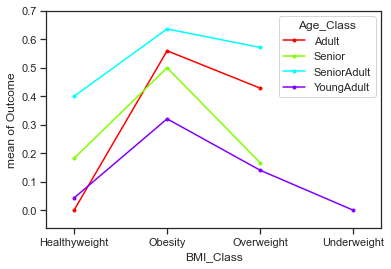

In [418]:
# interaction plot

fig = interaction_plot(x=data_class['BMI_Class'],
                       trace=data_class['Age_Class'],response=data_class['Outcome'])
plt.show()

In [419]:
twotukeyres = stat()
twotukeyres.tukey_hsd(df=data_class, res_var='Outcome',
                      xfac_var=['BMI_Class','Age_Class'],
                      anova_model='Outcome ~ C(BMI_Class) + C(Age_Class) + C(BMI_Class):C(Age_Class)')
twotukeyres.tukey_summary


NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.


group1                     group2      Diff  \
0        (Obesity, SeniorAdult)      (Obesity, YoungAdult)  0.315689   
1        (Obesity, SeniorAdult)           (Obesity, Adult)  0.076731   
2        (Obesity, SeniorAdult)          (Obesity, Senior)  0.136364   
3        (Obesity, SeniorAdult)  (Overweight, SeniorAdult)  0.064935   
4        (Obesity, SeniorAdult)   (Overweight, YoungAdult)  0.496177   
..                          ...                        ...       ...   
115  (Underweight, SeniorAdult)       (Underweight, Adult)       NaN   
116  (Underweight, SeniorAdult)      (Underweight, Senior)       NaN   
117   (Underweight, YoungAdult)       (Underweight, Adult)  0.000000   
118   (Underweight, YoungAdult)      (Underweight, Senior)  0.000000   
119        (Underweight, Adult)      (Underweight, Senior)       NaN   

        Lower     Upper   q-value   p-value  
0   -0.015694  0.647071  4.634926  0.082310  
1   -0.270787  0.424248  1.074251  0.900000  
2   -0.336186  0.608913  1.403992  0.900000  
3   -0.580279  0.710149  0.489654  0.900000  
4    0.148115  0.844239  6.935745  0.001000  
..        ...       ...       ...       ...  
115       NaN       NaN       NaN  0.556613  
116       NaN       NaN       NaN  0.556613  
117      -inf       inf  0.000000  0.900000  
118      -inf       inf  0.000000  0.900000  
119       NaN       NaN       NaN  0.556613  

[120 rows x 7 columns]

In [421]:


# df = pd.DataFrame(data=twotukeyres.tukey_summary.data[1:], columns=twotukeyres.tukey_summary.data[0])
# df


ValueError: DataFrame constructor not properly called!

In [422]:
obs = data_class.groupby(['BMI_Class', 'Age_Class']).size().reset_index(name = 'Count')
obs

BMI_Class    Age_Class  Count
0   Healthyweight        Adult      9
1   Healthyweight       Senior     11
2   Healthyweight  SeniorAdult      5
3   Healthyweight   YoungAdult     70
4         Obesity        Adult    109
5         Obesity       Senior     18
6         Obesity  SeniorAdult     22
7         Obesity   YoungAdult    237
8      Overweight        Adult     28
9      Overweight       Senior     12
10     Overweight  SeniorAdult      7
11     Overweight   YoungAdult    107
12    Underweight   YoungAdult      4